# Kaggle-WHO suicide statistics dataset

## 2019-02-21

## Summary

- The suicides population of male is increasing


- The suicides percentage of male is increasing


- 35-54 year suicides population is highest and increasing


- Russian.USA and Japan are top3 country that has more suicides population


- Suicides rate after 2013 is increasing


- Suicides rate between 1979-2013 is increasing


- Suicides population and population may decrease in the future


- Suicides rate may increase in the future

In [368]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
original=pd.read_csv('./who_suicide_statistics.csv')

In [370]:
print(original.head())
print(original.shape)
print(original.dtypes)
print(original.isnull().sum())
print(original.describe())

   country  year     sex          age  suicides_no  population
0  Albania  1985  female  15-24 years          NaN    277900.0
1  Albania  1985  female  25-34 years          NaN    246800.0
2  Albania  1985  female  35-54 years          NaN    267500.0
3  Albania  1985  female   5-14 years          NaN    298300.0
4  Albania  1985  female  55-74 years          NaN    138700.0
(43776, 6)
country         object
year             int64
sex             object
age             object
suicides_no    float64
population     float64
dtype: object
country           0
year              0
sex               0
age               0
suicides_no    2256
population     5460
dtype: int64
               year   suicides_no    population
count  43776.000000  41520.000000  3.831600e+04
mean    1998.502467    193.315390  1.664091e+06
std       10.338711    800.589926  3.647231e+06
min     1979.000000      0.000000  2.590000e+02
25%     1990.000000      1.000000  8.511275e+04
50%     1999.000000     14.000000  3.8

In [371]:
x=list(original['country'].unique())
for i in x:
    if original.loc[original['country']==str(i),'suicides_no'].isnull().sum()>0:
        original.loc[original['country']==str(i),'suicides_no'] = \
        original.loc[original['country']==str(i),'suicides_no'].fillna( \
        round(np.mean(original.loc[original['country']==str(i),'suicides_no']),0))
    else:
        pass
else:
    pass


In [372]:
original.isnull().sum()

country           0
year              0
sex               0
age               0
suicides_no       0
population     5460
dtype: int64

In [373]:
original.loc[:,'population']=original.loc[:,'population'].fillna(np.mean(original.loc[:,'population']))

In [374]:
original.isnull().sum()

country        0
year           0
sex            0
age            0
suicides_no    0
population     0
dtype: int64

In [375]:
print(original.loc[original['year']==2016].size)
print(original.loc[original['year']==2015].size)
print(original.loc[original['year']==2012].size)

1800
5760
7992


## Visualization-by year

In [376]:
original.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,7.0,277900.0
1,Albania,1985,female,25-34 years,7.0,246800.0
2,Albania,1985,female,35-54 years,7.0,267500.0
3,Albania,1985,female,5-14 years,7.0,298300.0
4,Albania,1985,female,55-74 years,7.0,138700.0


In [377]:
groupbyyear=original.loc[:,['year','suicides_no']].groupby(by='year')
yearcount=groupbyyear.sum()
yearcount.tail()

,suicides_no
year,
2012,237241.0
2013,230921.0
2014,229449.0
2015,210668.0
2016,53803.0


In [378]:
yearcount.drop(index=2016,inplace=True)
yearcount.drop(index=2015,inplace=True)

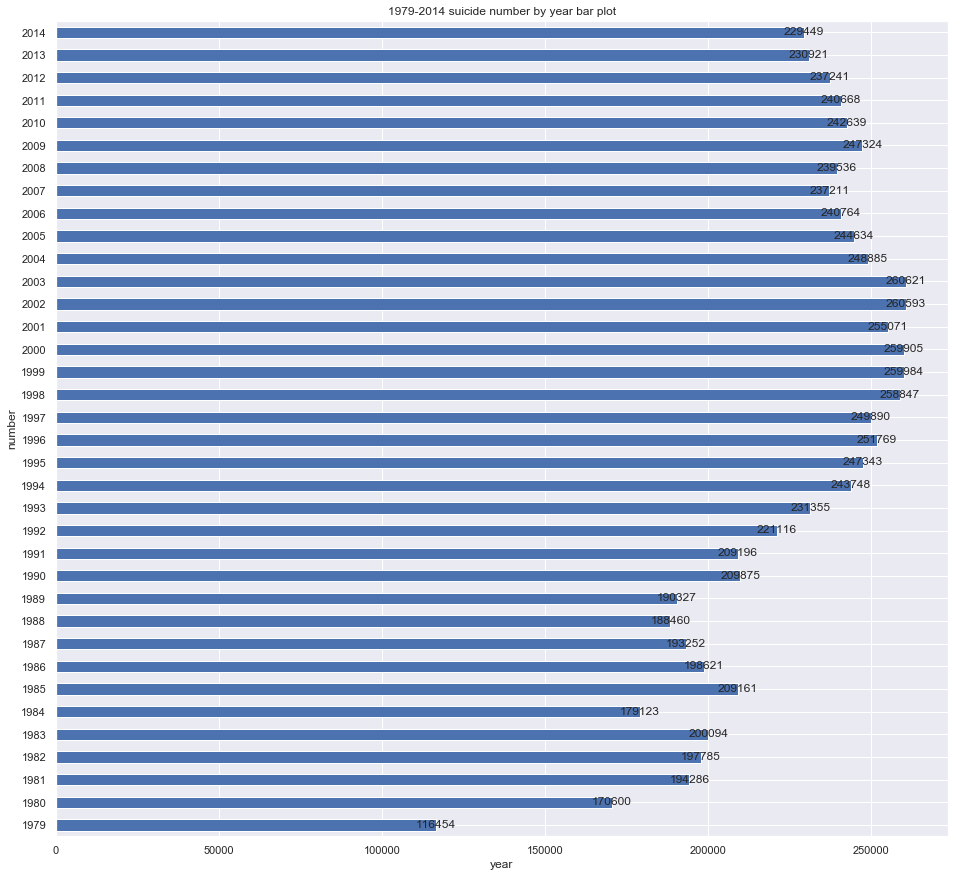

In [379]:
sns.set()
p0=yearcount.plot.barh(title=r'1979-2014 suicide number by year bar plot',figsize=(16,15),legend=False)
p0.get_figure()
plt.xlabel('year')
plt.ylabel('number')
plt.yticks(range(yearcount.index.shape[0]),yearcount.index)
x=np.arange(yearcount.index.shape[0])
y=np.array(yearcount['suicides_no'])
for i,j in zip(x,y):
    plt.text(j,i-0.2,'%d'%j,ha='center',va='bottom')
else:
    pass
plt.savefig('total_by_year_bar.png')
plt.show()

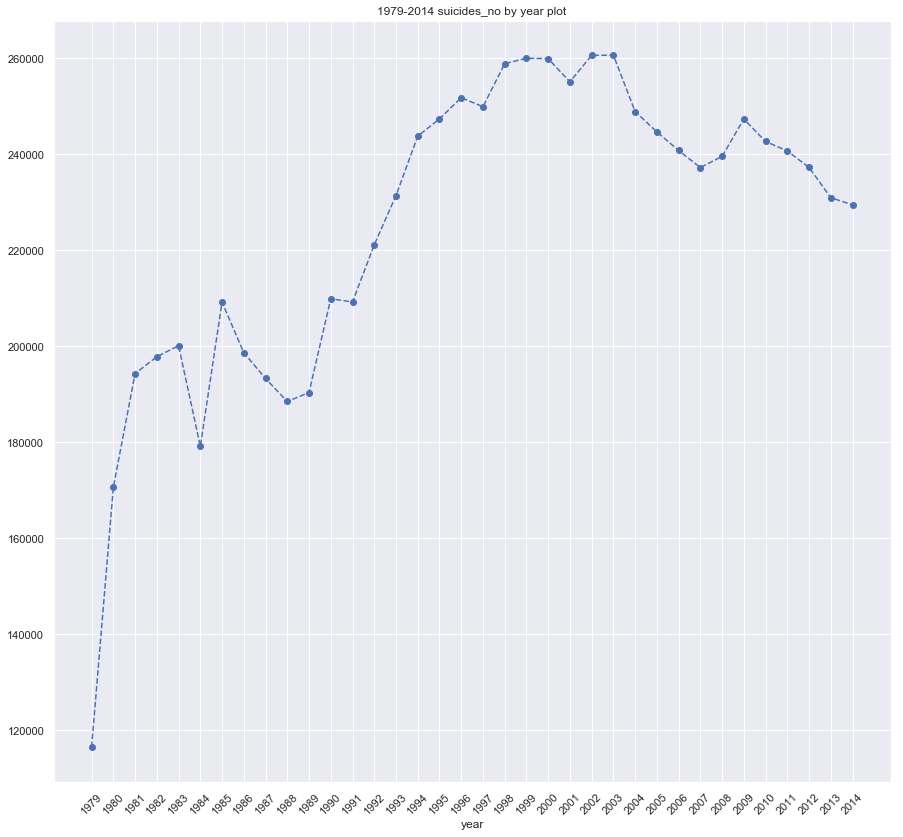

In [380]:
sns.set()
yearcount.index=yearcount.index.astype('str')
z1=yearcount.plot(figsize=(15,14),linestyle='--',marker='o',legend=False)
z1.get_figure()
plt.title(r'1979-2014 suicides_no by year plot')
plt.xticks(range(yearcount.index.shape[0]),yearcount.index,rotation=45)
plt.savefig('./total_by_year_plot.png')
plt.show()

## by year

With bar chart,

1998-2003 have higher suicides population

And with plot chart,

suicides population has small fluctuation

but seems to be decrease

## Visualization-by gender

In [381]:
gender=pd.pivot_table(original,index='year',columns='sex',values='suicides_no',aggfunc=np.sum)

In [382]:
gender.drop(index=2015,inplace=True)
gender.drop(index=2016,inplace=True)

In [383]:
gender.tail()

sex,female,male
year,,
2010,55327.0,187312.0
2011,55816.0,184852.0
2012,55612.0,181629.0
2013,53973.0,176948.0
2014,53858.0,175591.0


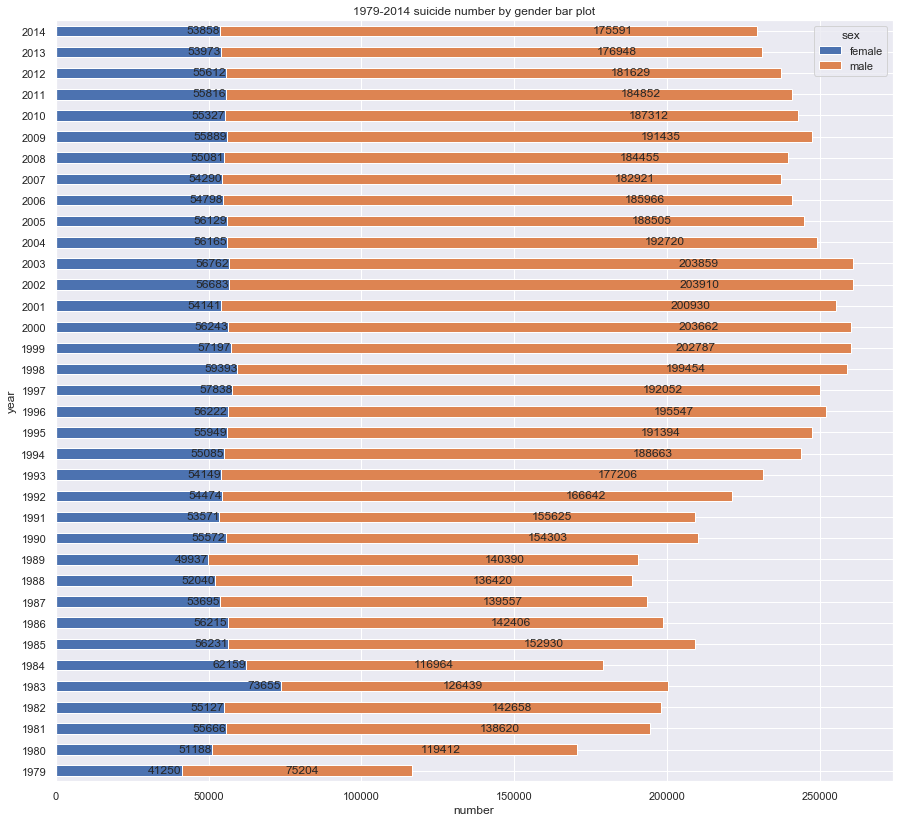

In [384]:
sns.set()
p1=gender.plot.barh(title=r'1979-2014 suicide number by gender bar plot', \
                   figsize=(15,14),stacked=True)
p1.get_figure()
plt.ylabel('year')
plt.xlabel('number')
x=np.arange(gender.index.shape[0])
y1=np.array(gender['female'])
y2=np.array(gender['male'])
for i,j in zip(x,y1):
    plt.text(j,i-0.2,'%d'%j,ha='right',va='bottom')
else:
    for k,l in zip(x,y2):
        plt.text(l,k-0.2,'%d'%l,ha='left',va='bottom')

plt.savefig('./total_by_gender_bar_plot.png')
plt.show()

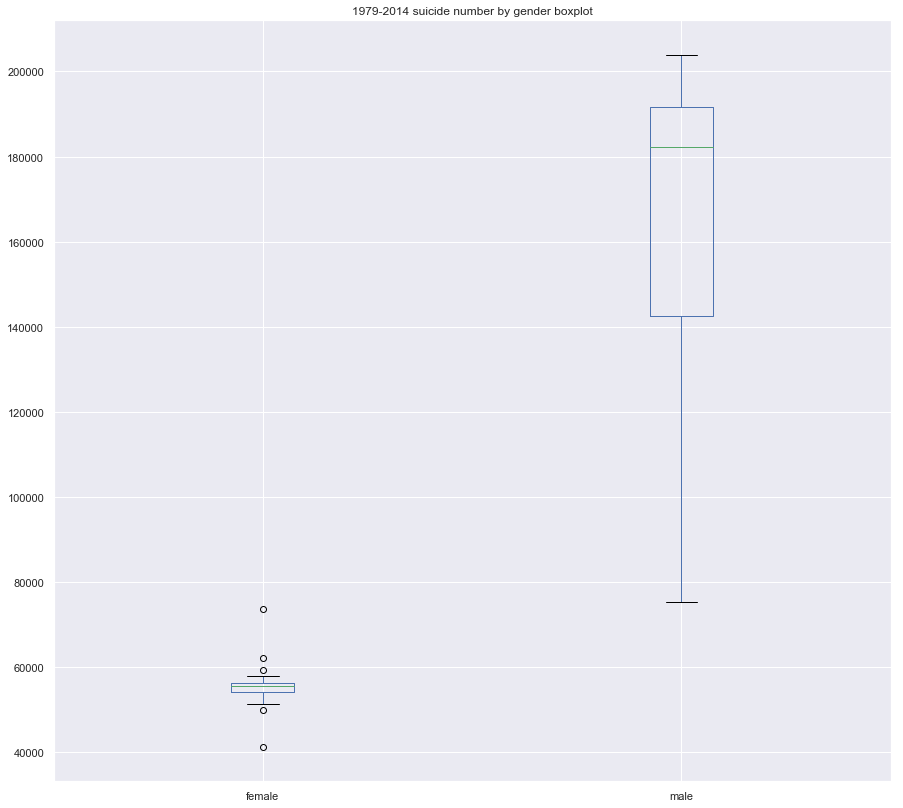

In [385]:
sns.set()
p2=gender.boxplot(figsize=(15,14))
p2.get_figure()
plt.title(r'1979-2014 suicide number by gender boxplot')
plt.savefig('./total_by_gender_boxplot.png')
plt.show()

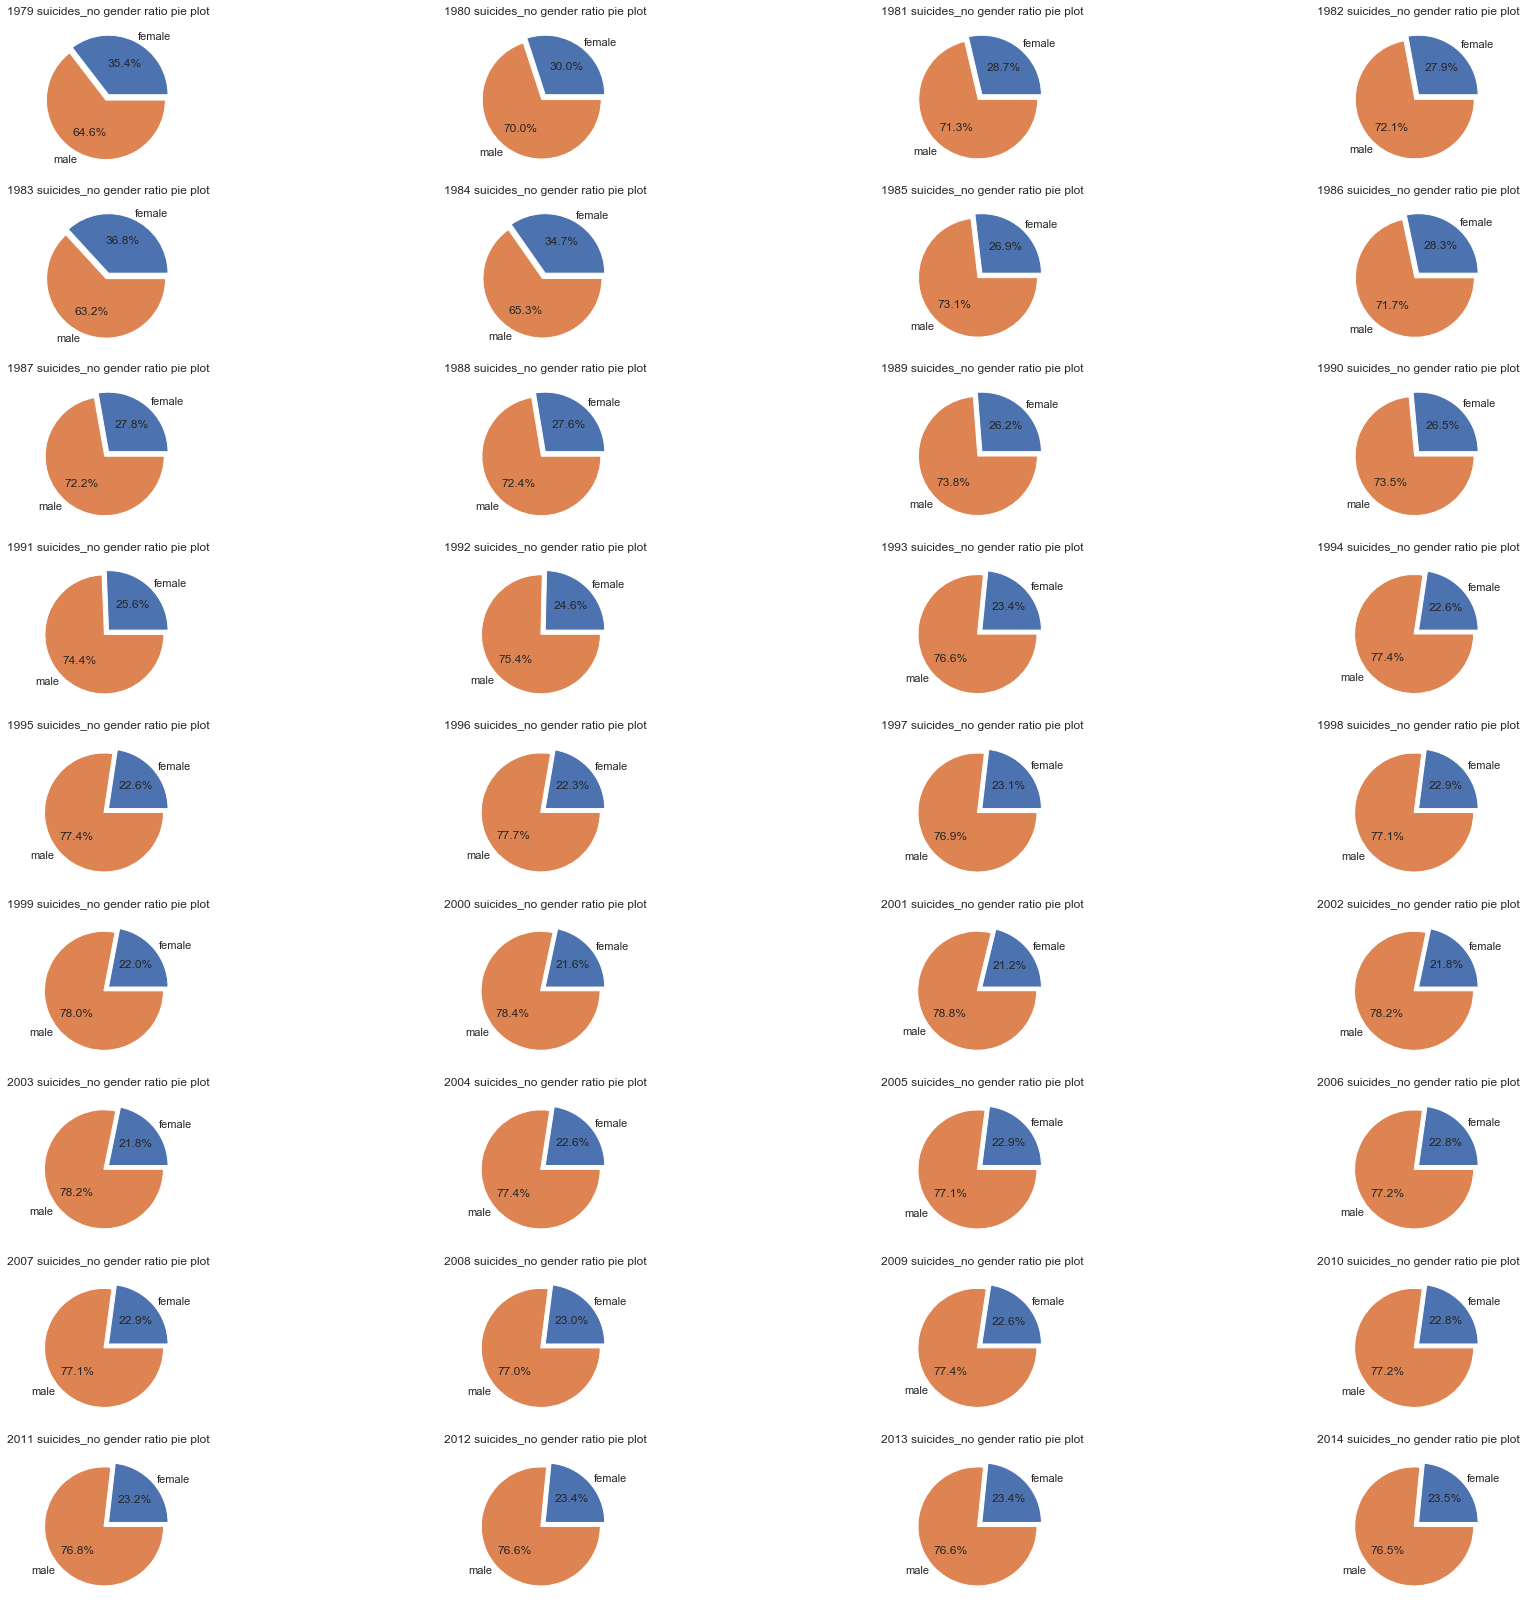

In [386]:
sns.set()
n1=plt.figure(figsize=(30,29))
explode=[0,0.1]
label=gender.columns
for i in range(36):
    n1.add_subplot(9,4,i+1)
    plt.title(r'%d suicides_no gender ratio pie plot'%gender.index[i])
    plt.pie(gender.iloc[i,:],autopct='%1.1f%%',explode=explode,labels=label)
else:
    pass
n1.savefig('./total_by_gender_pie.png')
plt.show()

## by gender

With bar chart,male is more than female,

male's population is increase,

and female's population is decrease.

With box chart,male is gently increase,

and female has no obvious change.

Because female has no obvious change,

smaller and bigger values are seem as abnormal values.

With pie chart,the percentage of male is increasing,

in 1987-1988,the percentage of female has abnormal change.

## Visualization-by age

In [387]:
agePivot=pd.pivot_table(original,index='year',columns='age',values='suicides_no',aggfunc=np.sum)
agePivot.tail()

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
2012,27561.0,37891.0,84244.0,2409.0,59743.0,25393.0
2013,25970.0,36744.0,82320.0,2205.0,58936.0,24746.0
2014,25437.0,36756.0,80809.0,2296.0,58734.0,25417.0
2015,23295.0,33574.0,73051.0,2231.0,54710.0,23807.0
2016,7526.0,8423.0,12306.0,6316.0,11133.0,8099.0


In [388]:
agePivot.drop(index=2016,inplace=True)

In [389]:
agePivot.tail()

age,15-24 years,25-34 years,35-54 years,5-14 years,55-74 years,75+ years
year,,,,,,
2011,28705.0,38703.0,86585.0,2083.0,59987.0,24605.0
2012,27561.0,37891.0,84244.0,2409.0,59743.0,25393.0
2013,25970.0,36744.0,82320.0,2205.0,58936.0,24746.0
2014,25437.0,36756.0,80809.0,2296.0,58734.0,25417.0
2015,23295.0,33574.0,73051.0,2231.0,54710.0,23807.0


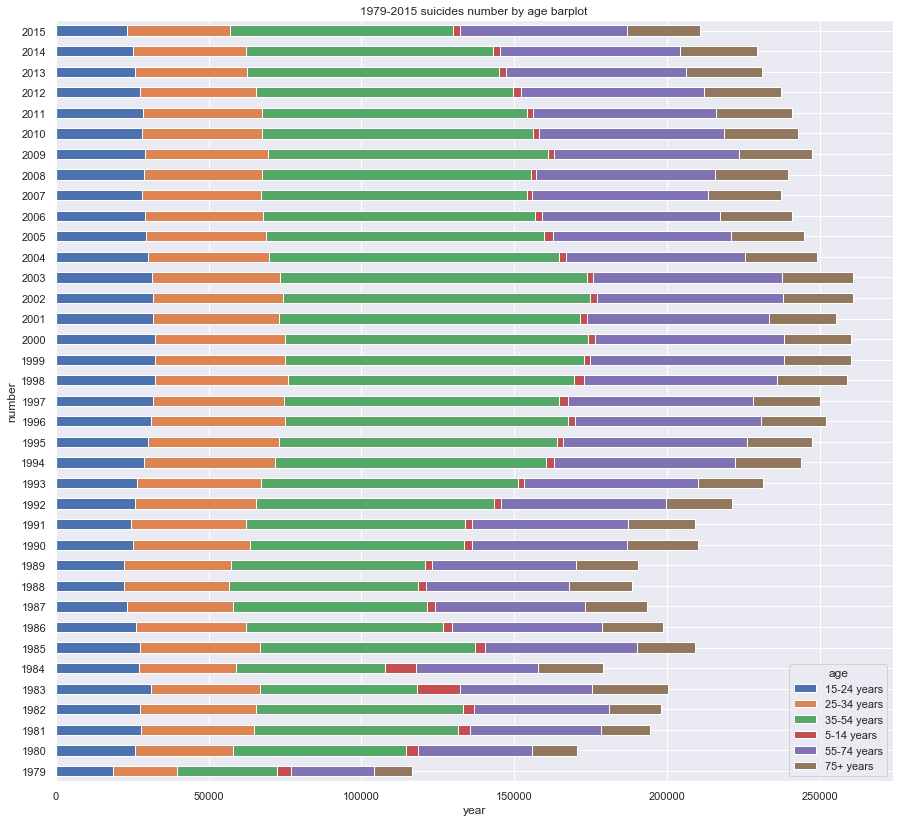

In [390]:
sns.set()
p3=agePivot.plot.barh(figsize=(15,14),stacked=True)
p3.get_figure()
plt.title(r'1979-2015 suicides number by age barplot')
plt.xlabel('year')
plt.ylabel('number')
plt.savefig('./total_by_age_barh.png')
plt.show()

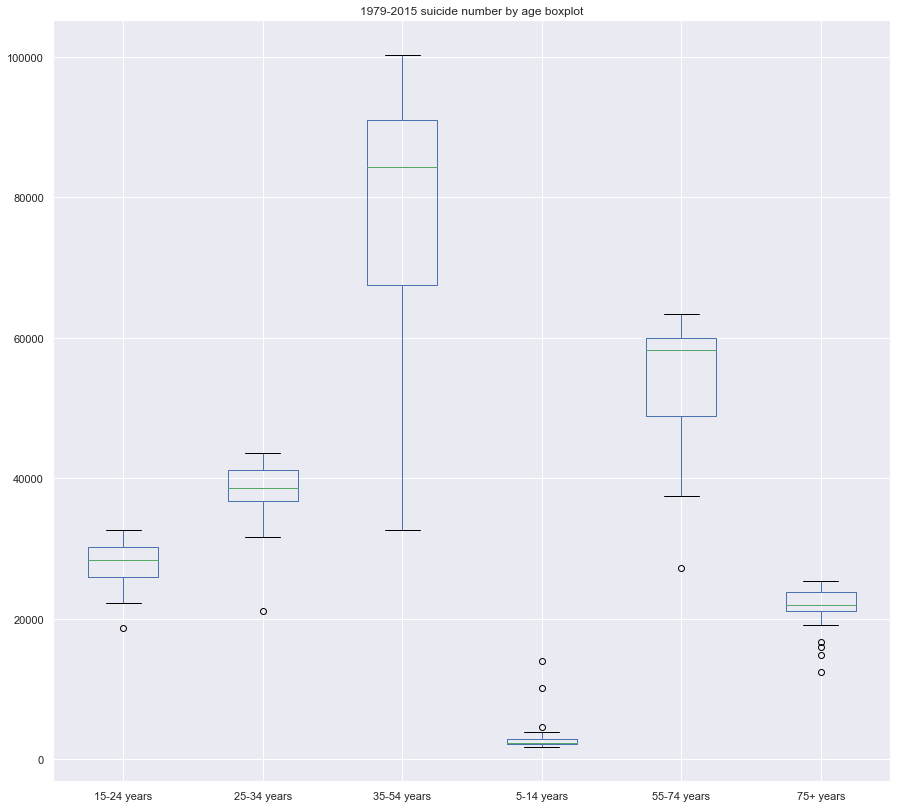

In [391]:
sns.set()
p4=agePivot.boxplot(figsize=(15,14))
p4.get_figure()
plt.title(r'1979-2015 suicide number by age boxplot')
plt.savefig('./total_by_age_boxplot.png')
plt.show()

## by age

With bar chart,age 35-54 is more than other age,

in 1983-1984,age 5-14 is increasing,but decrease by next year.

other age seems to be gently trend.

With box chart,age 35-54 and age 55-74 has gently increasing,

And other age have no obvious change,especially 5-14 years.

Because other age have no obvious change,some values are seem as abnormal values.

## Visualization-by country

In [392]:
original.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,7.0,277900.0
1,Albania,1985,female,25-34 years,7.0,246800.0
2,Albania,1985,female,35-54 years,7.0,267500.0
3,Albania,1985,female,5-14 years,7.0,298300.0
4,Albania,1985,female,55-74 years,7.0,138700.0


In [393]:
countryPivot=pd.pivot_table(original,index='year',columns='country',values='suicides_no',aggfunc=np.sum)
countryPivot.head()

country,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA),Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1979,NaN,NaN,NaN,1802.0,NaN,NaN,1675.0,1632.0,NaN,0.0,...,NaN,NaN,NaN,4765.0,27189.0,444.0,NaN,589.0,NaN,NaN
1980,NaN,NaN,NaN,1972.0,NaN,NaN,1606.0,1932.0,NaN,1.0,...,0.0,NaN,NaN,4917.0,26852.0,274.0,NaN,720.0,3.0,NaN
1981,NaN,NaN,NaN,2197.0,92.0,NaN,1671.0,2032.0,287.0,1.0,...,0.0,11883.0,NaN,5025.0,27574.0,261.0,1149.0,669.0,12.0,NaN
1982,NaN,NaN,NaN,1965.0,70.0,NaN,1766.0,2070.0,239.0,NaN,...,NaN,12528.0,NaN,4933.0,28226.0,318.0,1134.0,686.0,12.0,NaN
1983,NaN,0.0,0.0,1834.0,72.0,NaN,1697.0,2041.0,144.0,5.0,...,NaN,11412.0,NaN,4926.0,28280.0,323.0,1524.0,785.0,NaN,NaN


In [394]:
countryPivot=countryPivot.fillna(0)
countryPivot.head()

country,Albania,Anguilla,Antigua and Barbuda,Argentina,Armenia,Aruba,Australia,Austria,Azerbaijan,Bahamas,...,Turks and Caicos Islands,Ukraine,United Arab Emirates,United Kingdom,United States of America,Uruguay,Uzbekistan,Venezuela (Bolivarian Republic of),Virgin Islands (USA),Zimbabwe
year,,,,,,,,,,,,,,,,,,,,,
1979,0.0,0.0,0.0,1802.0,0.0,0.0,1675.0,1632.0,0.0,0.0,...,0.0,0.0,0.0,4765.0,27189.0,444.0,0.0,589.0,0.0,0.0
1980,0.0,0.0,0.0,1972.0,0.0,0.0,1606.0,1932.0,0.0,1.0,...,0.0,0.0,0.0,4917.0,26852.0,274.0,0.0,720.0,3.0,0.0
1981,0.0,0.0,0.0,2197.0,92.0,0.0,1671.0,2032.0,287.0,1.0,...,0.0,11883.0,0.0,5025.0,27574.0,261.0,1149.0,669.0,12.0,0.0
1982,0.0,0.0,0.0,1965.0,70.0,0.0,1766.0,2070.0,239.0,0.0,...,0.0,12528.0,0.0,4933.0,28226.0,318.0,1134.0,686.0,12.0,0.0
1983,0.0,0.0,0.0,1834.0,72.0,0.0,1697.0,2041.0,144.0,5.0,...,0.0,11412.0,0.0,4926.0,28280.0,323.0,1524.0,785.0,0.0,0.0


In [395]:
countryPivot.index.shape

(38,)

In [396]:
countrysum=pd.DataFrame(countryPivot.apply(np.sum))
countrysum=countrysum.rename(columns={0:'total'})
countrysum=countrysum.sort_values(by='total',ascending=False)

In [397]:
countrysum.head()

,total
country,
Russian Federation,1589288.0
United States of America,1233873.0
Japan,937614.0
France,395500.0
Ukraine,376582.0


In [398]:
top5=countrysum.iloc[0:5,:]

In [399]:
top5

,total
country,
Russian Federation,1589288.0
United States of America,1233873.0
Japan,937614.0
France,395500.0
Ukraine,376582.0


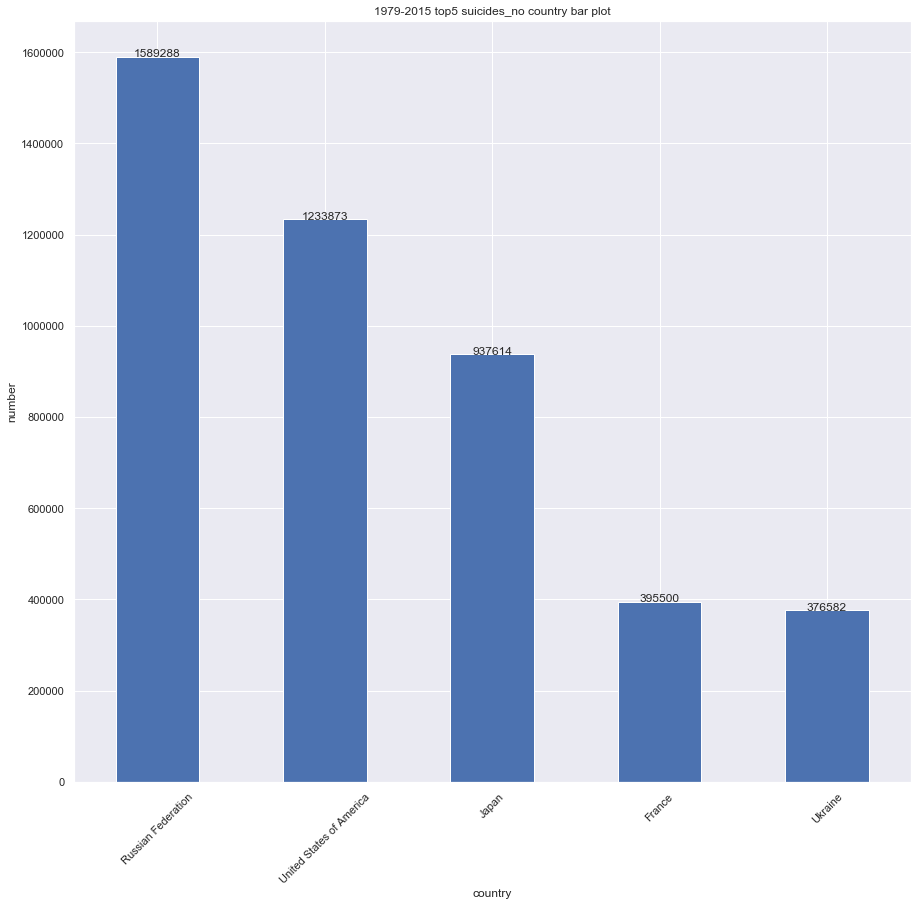

In [400]:
sns.set()
p5=top5.plot.bar(figsize=(15,14),legend=False)
p5.get_figure()
plt.title(r'1979-2015 top5 suicides_no country bar plot')
plt.xlabel('country')
plt.ylabel('number')
plt.xticks(range(top5.index.shape[0]),top5.index,rotation=45)
x=np.arange(top5.index.shape[0])
y=np.array(top5.loc[:,'total'])
for i,j in zip(x,y):
    plt.text(i,j,'%d'%j,ha='center')
else:
    pass
plt.savefig('./top5_country_bar_plot.png')
plt.show()

## top5 country

With bar chart,Russian.USA and Japan has higher values.

Then,France and Ukraine are much smaller than top3.



## Visualization--year rate

In [401]:
original.head()

,country,year,sex,age,suicides_no,population
0,Albania,1985,female,15-24 years,7.0,277900.0
1,Albania,1985,female,25-34 years,7.0,246800.0
2,Albania,1985,female,35-54 years,7.0,267500.0
3,Albania,1985,female,5-14 years,7.0,298300.0
4,Albania,1985,female,55-74 years,7.0,138700.0


In [402]:
yearRateGroup=original.groupby(by='year')
yearsum=yearRateGroup.sum()
yearsum.head()

,suicides_no,population
year,,
1979,116454.0,1.004138e+09
1980,170600.0,1.319940e+09
1981,194286.0,1.450182e+09
1982,197785.0,1.356331e+09
1983,200094.0,1.453388e+09


In [403]:
yearsum['suicides_rate']=yearsum['suicides_no']/yearsum['population']
yearsum.tail()

,suicides_no,population,suicides_rate
year,,,
2012,237241.0,2.306191e+09,0.000103
2013,230921.0,2.431208e+09,0.000095
2014,229449.0,2.367220e+09,0.000097
2015,210668.0,2.088440e+09,0.000101
2016,53803.0,6.053159e+08,0.000089


In [404]:
yearsum.drop(index=[2015,2016],inplace=True)

In [405]:
rate=pd.DataFrame(yearsum.loc[:,'suicides_rate'])
rate.tail()


,suicides_rate
year,
2010,0.000100
2011,0.000102
2012,0.000103
2013,0.000095
2014,0.000097


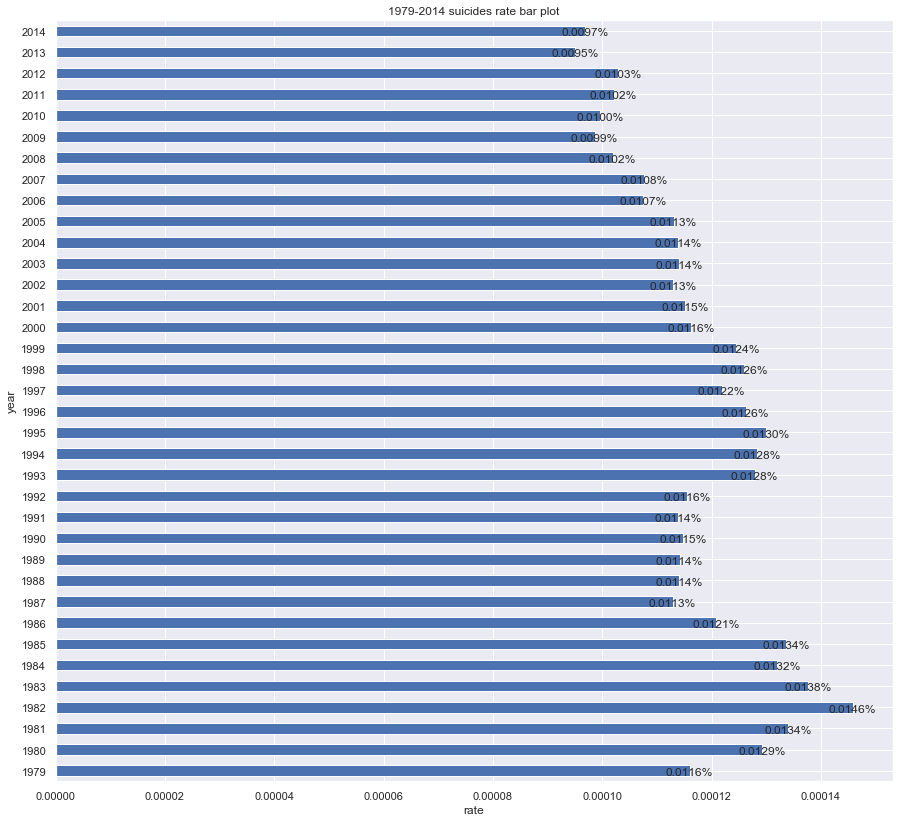

In [406]:
sns.set()
p6=rate.plot.barh(figsize=(15,14),legend=False)
p6.get_figure()
plt.title(r'1979-2014 suicides rate bar plot')
plt.xlabel('rate')
x=np.array(rate['suicides_rate'])
y=np.arange(rate.index.shape[0])
for i,j in zip(x,y):
    plt.text(i,j-0.2,'%.4f%%'%(i*100),ha='center')
else:
    pass
plt.savefig('./suicides_rate_by_year_bar.png')
plt.show()

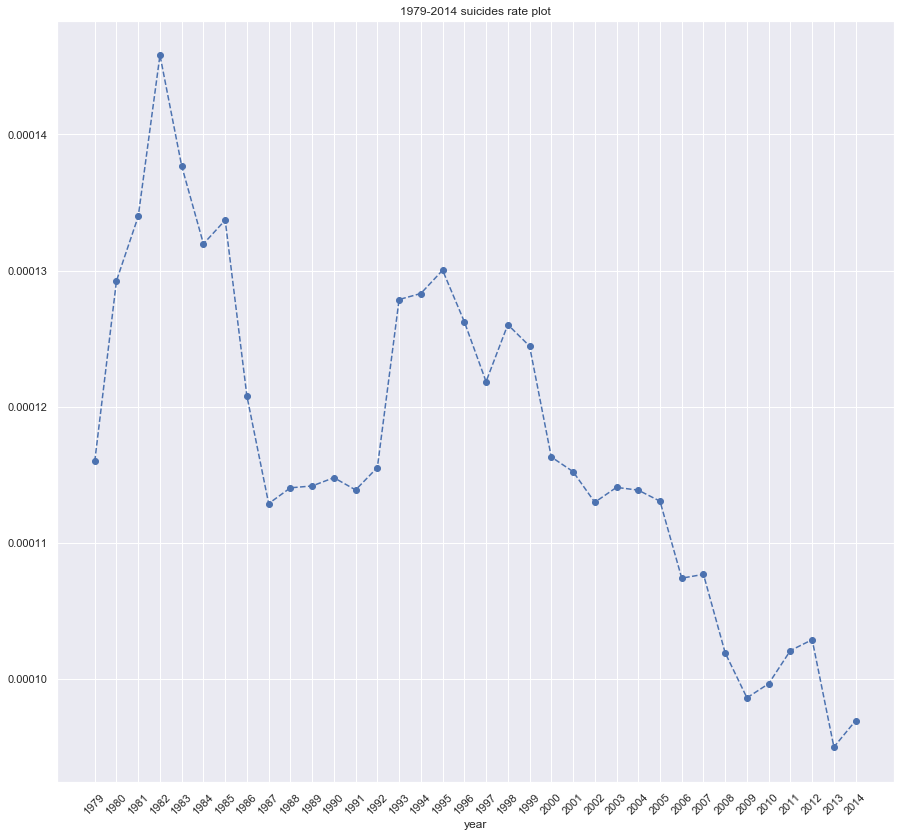

In [407]:
sns.set()
rate.index=rate.index.astype('str')
z2=rate.plot(figsize=(15,14),linestyle='--',marker='o',legend=False)
z2.get_figure()
plt.title(r'1979-2014 suicides rate plot')
plt.xticks(range(rate.index.shape[0]),rate.index,rotation=45)
plt.savefig('./suicides_rate_by_year_plot.png')
plt.show()

## year rate

With plot chart,the trend of suicides rate is decreasing.

But after 2013,suicides rate has increasing trend.

And 1980 is highest,

1992-1998 is another higher section.

## Predict--with population predict formula

With data that is total by year,using population predict formula,

and using previous population for basic period.

### population predict formula:

$${M_n}={M_0}*{(1+V)}^n$$

${M_n}$=predicted period.

${M_0}$=basic period.

V=Growth rate

n=year value


### growth rate formula:

$$\frac{{a_i}-{a_{i-1}}}{a_{i-1}}$$

In [408]:
yearsum.index[-1]

2014

In [409]:
def populationpredict(data):
    basic_suicide=float(data.iloc[-2,0])
    basic_population=float(data.iloc[-2,1])
    suicidesrate=(data.iloc[-1,0]-basic_suicide)/(basic_suicide)
    suicidespredict=data.iloc[-1,0]*(1+suicidesrate)
    populationrate=(data.iloc[-1,1]-basic_population)/(basic_population)
    populationpredict=data.iloc[-1,1]*(1+populationrate)
    rate=suicidespredict/populationpredict
    x=[suicidespredict,populationpredict,rate]
    x=pd.DataFrame(x)
    x=x.T
    x=x.rename(columns={0:'suicides_no',
                      1:'population',
                      2:'suicides_rate'})
    x=x.rename(index={0:data.index[-1]+1})
    return x

In [410]:
suicides2015=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2015])
suicides2016=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2016])
yearsum.tail()

,suicides_no,population,suicides_rate
2012,237241.000000,2.306191e+09,0.000103
2013,230921.000000,2.431208e+09,0.000095
2014,229449.000000,2.367220e+09,0.000097
2015,227986.383226,2.304916e+09,0.000099
2016,226533.089866,2.244251e+09,0.000101


In [411]:
suicides2017=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2017])
suicides2018=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2018])
suicides2019=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2019])

In [412]:
suicides2020=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2020])
suicides2021=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2021])
suicides2022=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2022])
suicides2023=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2023])

In [413]:
suicides2024=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2024])
suicides2025=populationpredict(yearsum)
yearsum=pd.concat([yearsum,suicides2025])

In [414]:
#yearsum.to_csv('./predict_no_population.csv')
yearsum.tail()

,suicides_no,population,suicides_rate
2021,219404.407354,1.964055e+09,0.000112
2022,218005.819579,1.912361e+09,0.000114
2023,216616.147066,1.862029e+09,0.000116
2024,215235.332985,1.813021e+09,0.000119
2025,213863.320867,1.765303e+09,0.000121


In [415]:
year0025=yearsum.iloc[21:,:]
year0025.head()
year0025.index=year0025.index.astype('str')

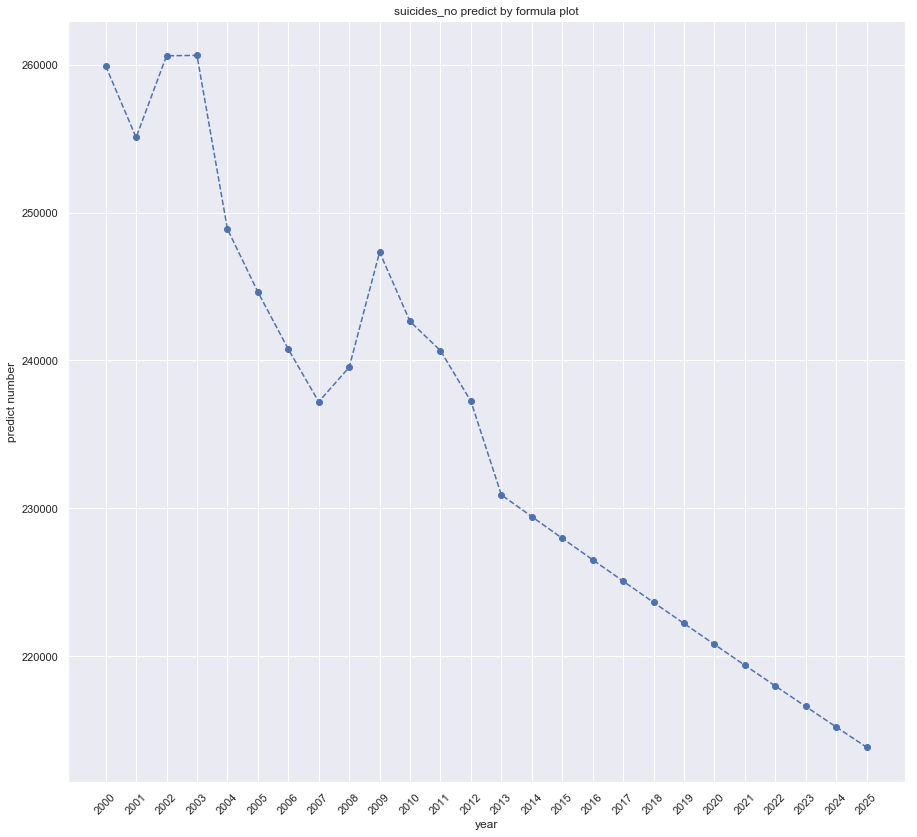

In [416]:
sns.set()
p7=plt.figure(figsize=(15,14))
plt.plot(year0025.iloc[:,0],linestyle='--',marker='o')
plt.title(r'suicides_no predict by formula plot')
plt.xlabel('year')
plt.ylabel(r'predict number')
plt.xticks(range(year0025.index.shape[0]),year0025.index,rotation=45)
p7.savefig('./predict_suicides_no_plot.png')
plt.show()

In [417]:
year0025.head()

,suicides_no,population,suicides_rate
2000,259905.0,2.234838e+09,0.000116
2001,255071.0,2.213706e+09,0.000115
2002,260593.0,2.306789e+09,0.000113
2003,260621.0,2.284859e+09,0.000114
2004,248885.0,2.185883e+09,0.000114


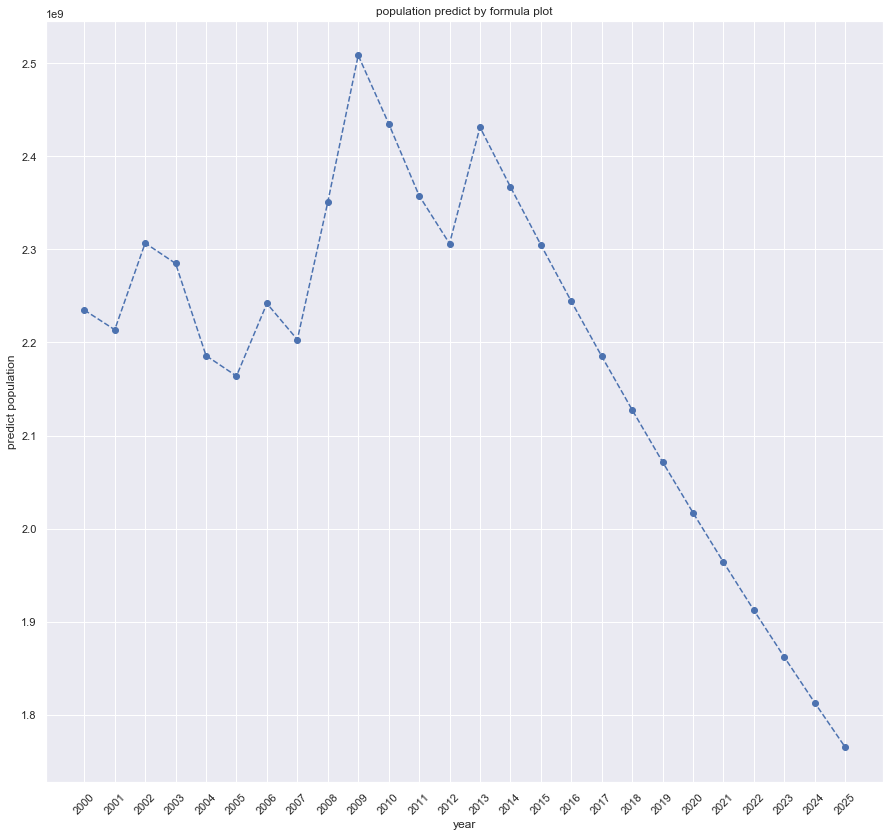

In [418]:
sns.set()
p8=plt.figure(figsize=(15,14))
plt.plot(year0025.iloc[:,1],linestyle='--',marker='o')
plt.xlabel('year')
plt.ylabel(r'predict population')
plt.xticks(range(year0025.index.shape[0]),year0025.index,rotation=45)
plt.title(r'population predict by formula plot')
p8.savefig('./predict_population_plot.png')
plt.show()

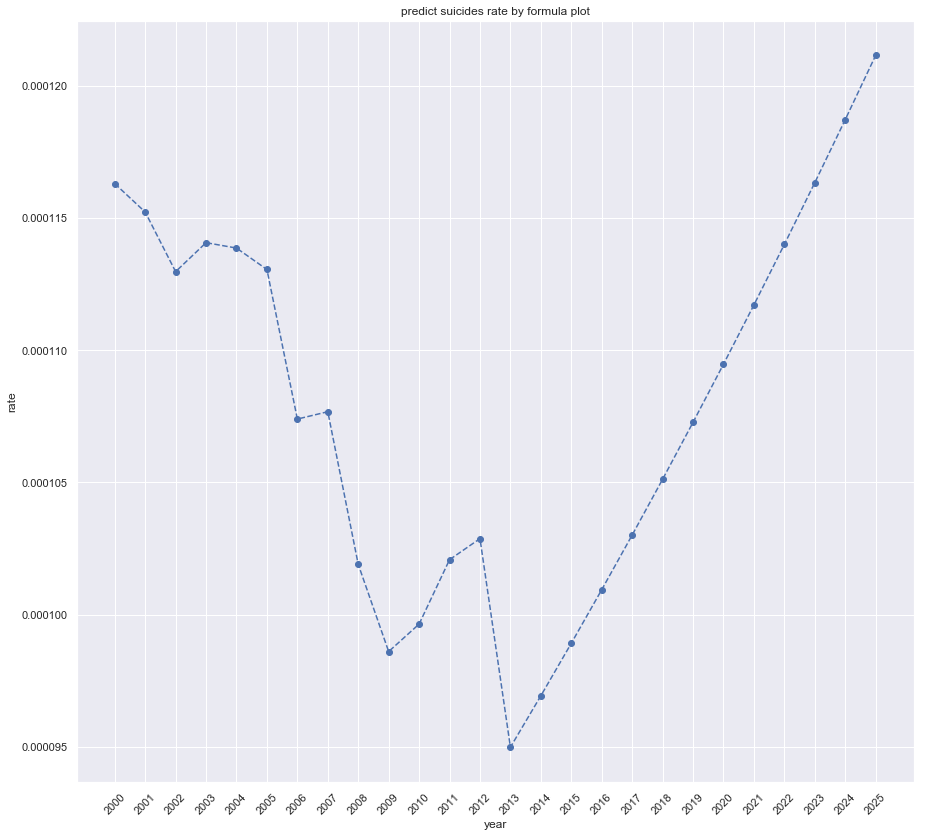

In [419]:
sns.set()
p9=plt.figure(figsize=(15,14))
plt.plot(year0025.iloc[:,2],linestyle='--',marker='o')
plt.xlabel('year')
plt.ylabel('rate')
plt.xticks(range(year0025.index.shape[0]),year0025.index,rotation=45)
plt.title(r'predict suicides rate by formula plot')
p9.savefig('./predict_suicides_rate_plot.png')
plt.show()

## Predict

With using population predict formula,

and using previous population for basic period,

suicides population and population is decreasing,

but suicides rate is increasing,

so we should be more seriously to face suicides.